# Guided Project: Storytelling Data Visualization on Exchange Rates
## Introducing the Dataset

In [ ]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.1,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.1,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [ ]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [ ]:
#exchange_rates['BR_real'].value_counts()

In [ ]:
exchange_rates.info()

## Data Cleaning

In [ ]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time',
                               '[Brazilian real ]': "BR_real"},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [ ]:
exchange_rates['US_dollar'] = pd.to_numeric(exchange_rates['US_dollar'].str.replace("-",'1'))
exchange_rates['BR_real'] = pd.to_numeric(exchange_rates['BR_real'].str.replace("-",'1'))

In [ ]:
exchange_rates['real_dolar'] = exchange_rates['BR_real']/exchange_rates['US_dollar']

In [ ]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

0.0000    62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.5206     1
1.3272     1
0.8591     1
1.2941     1
1.2804     1
Name: US_dollar, Length: 3528, dtype: int64

In [ ]:
dolar_real = exchange_rates[['Time','real_dolar']]
dolar_real.sample(5)

,Time,real_dolar
903,2002-06-20,2.706318
5173,2018-12-17,3.911031
4535,2016-06-22,3.399539
3160,2011-02-14,1.669494
377,2000-06-14,1.812474


In [ ]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['real_dolar'] != '-']
euro_to_dollar['real_dolar'] = euro_to_dollar['real_dolar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

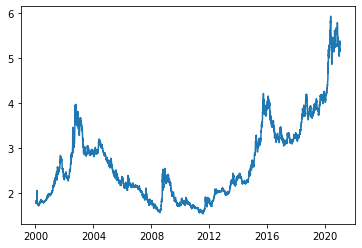

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

plt.plot(dolar_real['Time'], dolar_real['real_dolar'])
plt.show()

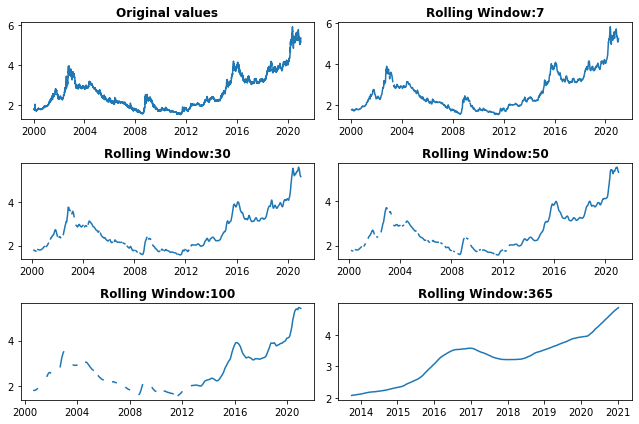

In [ ]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(dolar_real['Time'], dolar_real['real_dolar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(dolar_real['Time'],
             dolar_real['real_dolar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [ ]:
dolar_real['rolling_mean'] = dolar_real['real_dolar'].rolling(30).mean()
dolar_real

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Time,real_dolar,rolling_mean
0,1999-01-04,NaN,NaN
1,1999-01-05,NaN,NaN
2,1999-01-06,NaN,NaN
3,1999-01-07,NaN,NaN
4,1999-01-08,NaN,NaN
...,...,...,...
5694,2021-01-04,5.143217,5.195524
5695,2021-01-05,5.339174,5.195500
5696,2021-01-06,5.277922,5.192749
5697,2021-01-07,5.308895,5.190071


## Coming Up With an Idea

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## Storytelling Data Visualization Examples

### Financial Crisis Example

In [ ]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

NameError: ignored

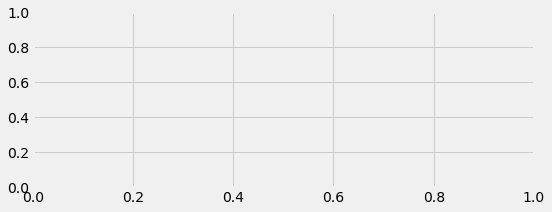

In [ ]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

### The Three US Presidencies Example

In [ ]:
real_euro = exchange_rates[['Time', 'BR_real']].copy()

presidents = dolar_real.copy(
                   )[(dolar_real['Time'].dt.year > 1995) & (dolar_real['Time'].dt.year <= 2021)]


            
fhc = presidents.copy(
       )[presidents['Time'].dt.year < 2003]
lula = presidents.copy(
       )[(presidents['Time'].dt.year >= 2003) & (presidents['Time'].dt.year < 2011)]
dilma_temer = presidents.copy(
       )[(presidents['Time'].dt.year >= 2011) & (presidents['Time'].dt.year < 2019)]
bolso = presidents.copy(
       )[(presidents['Time'].dt.year >= 2019) & (presidents['Time'].dt.year <= 2021)]

In [ ]:
real_euro = exchange_rates[['Time', 'BR_real']].copy()
real_euro['rolling_mean'] = real_euro['BR_real'].rolling(30).mean()

presidents = real_euro.copy(
                   )[(real_euro['Time'].dt.year > 1995) & (real_euro['Time'].dt.year <= 2021)]
fhc = presidents.copy(
       )[presidents['Time'].dt.year < 2003]
lula = presidents.copy(
       )[(presidents['Time'].dt.year >= 2003) & (presidents['Time'].dt.year < 2011)]
dilma_temer = presidents.copy(
       )[(presidents['Time'].dt.year >= 2011) & (presidents['Time'].dt.year < 2019)]
bolso = presidents.copy(
       )[(presidents['Time'].dt.year >= 2019) & (presidents['Time'].dt.year <= 2021)]

In [ ]:
presidents[(presidents['Time'].dt.year <= 2000)]

,Time,real_dolar,rolling_mean
0,1999-01-04,NaN,NaN
1,1999-01-05,NaN,NaN
2,1999-01-06,NaN,NaN
3,1999-01-07,NaN,NaN
4,1999-01-08,NaN,NaN
...,...,...,...
515,2000-12-25,NaN,NaN
516,2000-12-26,NaN,NaN
517,2000-12-27,1.960473,NaN
518,2000-12-28,1.957458,NaN


In [ ]:

biden_start = datetime(year=2021,month=1,day=1)

biden = bush_obama_trump_biden.copy(
            )[bush_obama_trump_biden['Time'].dt.to_pydatetime() >= biden_start]

Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more
flexibility in arranging the subplots:

- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
- We then build only the _bottom_ graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row. 

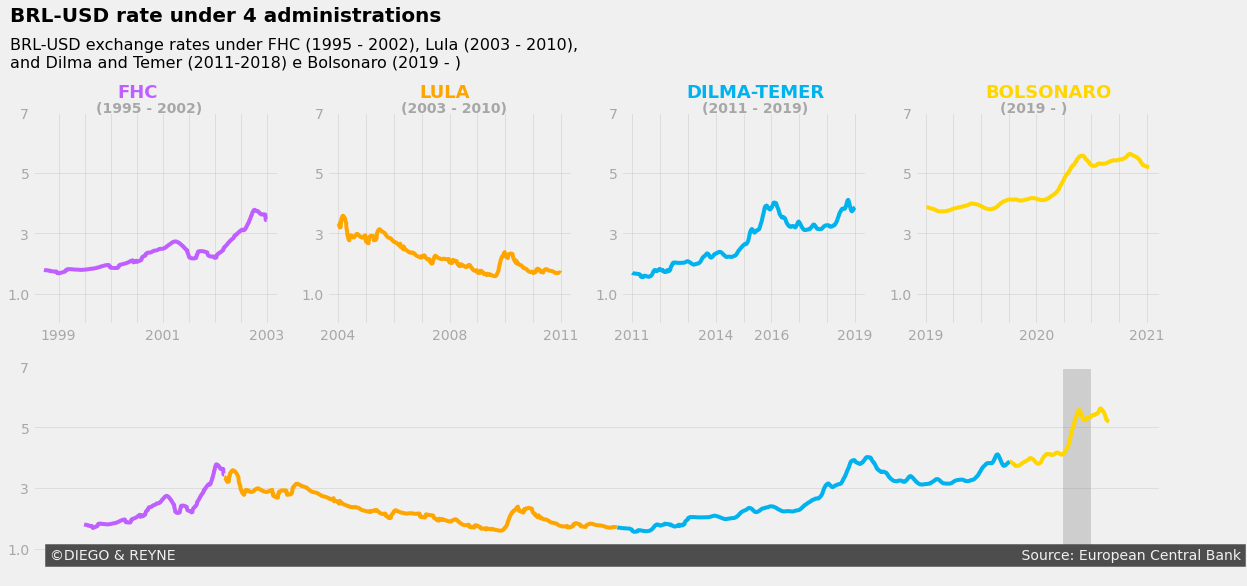

In [ ]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')


### Adding the subplots
plt.figure(figsize=(18, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0, 6)
    ax.set_yticks([1.0, 3,5,7])
    ax.set_yticklabels(['1.0', '3','5','7'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: FHC
ax1.plot(fhc['Time'], fhc['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['1999','',"","",'2001',"","",'','2003'],
                   alpha=0.3)
ax1.text(730516.0, 7.5, 'FHC', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(730416.0, 7, '(1995 - 2002)', weight='bold',
        alpha=0.3)


### Ax2: LULA
ax2.plot(lula['Time'], lula['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2004', '', '', '', '2008', '',
                     '', '', '2011'],
                   alpha=0.3)
ax2.text(732285.0, 7.5, 'LULA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(732038.0, 7, '(2003 - 2010)', weight='bold',
         alpha=0.3)


### Ax3: DILMA _ TEMER
ax3.plot(dilma_temer['Time'], dilma_temer['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(["",'2011', '',"", '2014', '',
                     '2016', '','', '2019'],
                   alpha=0.3)
ax3.text(734855.0, 7.5, 'DILMA-TEMER', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(735055.0,7, '(2011 - 2019)', weight='bold',
         alpha=0.3)

### Ax4: BOZO 
ax4.plot(bolso['Time'], bolso['rolling_mean'],
        color='#FFD600')
ax4.set_xticklabels(['2019',"","","","2020","","","", '2021'],
                   alpha=0.3)
ax4.text(737255.0, 7.5, 'BOLSONARO', fontsize=18, weight='bold',
        color='#FFD600')
ax4.text(737305.0, 7, '(2019 - )', weight='bold',
         alpha=0.3)


### Ax4: Bush-Obama-Trump-Biden
ax5.plot(fhc['Time'], fhc['rolling_mean'],
        color='#BF5FFF')
ax5.plot(lula['Time'], lula['rolling_mean'],
        color='#ffa500')
ax5.plot(dilma_temer['Time'], dilma_temer['rolling_mean'],
        color='#00B2EE')
ax5.plot(bolso['Time'], bolso['rolling_mean'],
        color='#FFD600')
ax5.grid(alpha=0.5)
ax5.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 10, 'BRL-USD rate under 4 administrations',
         fontsize=20, weight='bold')
ax1.text(730016.0, 8.5, '''BRL-USD exchange rates under FHC (1995 - 2002), Lula (2003 - 2010),
and Dilma and Temer (2011-2018) e Bolsonaro (2019 - )''',
        fontsize=16)
ax5.axvspan(xmin=737455.0, xmax=737655.0, ymin=0.09,
           alpha=0.3, color='grey')
### Adding a signature
ax5.text(729916.0, 0.65, '©DIEGO & REYNE' + ' '*188 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.savefig('Teste.png')

In [ ]:
real_euro = exchange_rates[['Time', 'BR_real']].copy()

In [ ]:
exchange_rates.dtypes